### The within-host system

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import style

# using the style for the plot
plt.style.use('seaborn-v0_8-bright')

Model parameters in vector form

In [2]:
# Dengue virus
paramsDENV = np.array([590, 1.0e-4, 0.03, 4, 2.5, 50, 13])

# Zika virus
paramsZIKV = np.array([159, 2e-5, 0.03, 4, 3.5, 1000, 10])

# West-nile virus
paramsWNV = np.array([4020, 4e-4, 0.03, 3, 23.03, 57.88 , 44.43])



### Code chunk 2: Model equations

In [11]:
def WHM(y, t, x):
    """initial conditions: y,
      within-host parameters: x"""
    T, L, Y, V= y
    L_T, betaWB, d, k, delta, p ,c = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    # Equations
    dTdt = L_T - betaWB*T*V - d*T
    dLdt = betaWB*T*V - (k+d)*L
    dYdt = k*L - delta*Y
    dVdt = p*Y - c*V
    return dTdt, dLdt, dYdt, dVdt


Model's solution

The initial condition vector has coordinates
$y_0 = (T(0), L(0), Y(0), V(0))$

In [12]:
y0DENV = 8e4, 0, 0, 1.

y0ZIKV = 1e4, 0, 0, 1.

y0WNV = 2.3e5, 0, 0, 1.


# A grid of time points (in days)
t = np.linspace(0, 12, 100)




# Solution of the model

solDENV = odeint(WHM, y0DENV, t, args=(paramsDENV,))
Tdenv, Ldenv, Ydenv, Vdenv = solDENV.T

solZIKV = odeint(WHM, y0ZIKV, t, (paramsZIKV,))
Tzikv, Lzikv, Yzikv, Vzikv = solZIKV.T


solWNV = odeint(WHM, y0WNV, t, (paramsWNV,))
Twnv, Lwnv, Ywnv, Vwnv = solWNV.T



### Plots

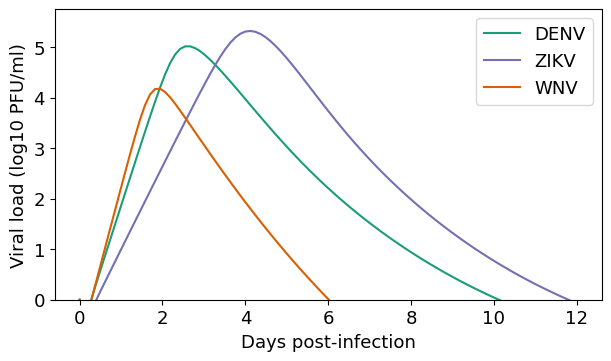

In [13]:
fig, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(6,3.5), sharex=False, sharey=False, constrained_layout=True)

#----------------------------------------------------

ax2.plot(t, np.log10(Vdenv), label='DENV', color='#1b9e77')
ax2.plot(t, np.log10(Vzikv), label='ZIKV', color='#7570b3')
ax2.plot(t, np.log10(Vwnv), label='WNV', color='#d95f02')
ax2.set_ylim(0.)
ax2.tick_params(labelsize=13)
ax2.set_ylabel(r"Viral load (log10 PFU/ml)", fontsize=13)
ax2.set_xlabel(r"Days post-infection", fontsize=13)
ax2.legend(loc='best', fontsize=13)
#plt.savefig("WH_model.pdf", bbox_inches = 'tight')
plt.show()